DT 0.8131868131868132
[[45  2]
 [15 29]]
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84        47
         1.0       0.94      0.66      0.77        44

    accuracy                           0.81        91
   macro avg       0.84      0.81      0.81        91
weighted avg       0.84      0.81      0.81        91

roc_auc_DT 0.842741935483871
ADA 0.8351648351648352
[[43  4]
 [11 33]]
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85        47
         1.0       0.89      0.75      0.81        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

roc_auc_ADA 0.8440940940940941
  mixed  p  q 0.8022 0.95 0.05
  mixed  p  q 0.8022 0.90 0.10
  mixed  p  q 0.8022 0.85 0.15
  mixed  p  q 0.8022 0.80 0.20
  mixed  p  q 0.8022 0.75 0.25
  mixed  p  q 0.8022 0.70 0.30
  mixed  p  q 0.8

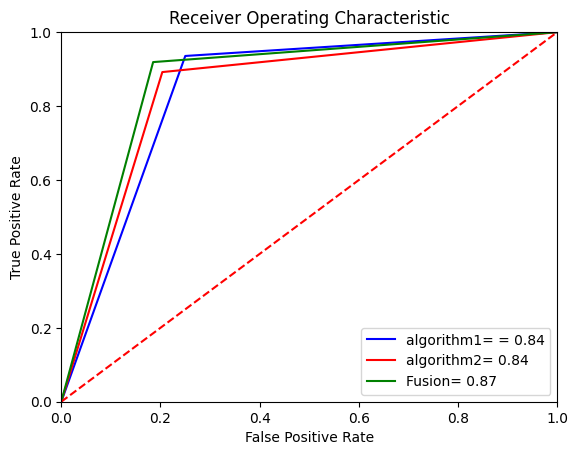

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier

dataset = pd.read_csv("/content/sample_data/binary classification.csv", delimiter=",")
dataset_array = dataset.to_numpy()
x = dataset_array[:,0:13]
y = dataset_array[:,13]

#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))

"""Information based algorithms (Decision Trees, Random Forests) and probability based algorithms (Naive Bayes, Bayesian Networks) don't require normalization either."""

#code for decision tree

model1 = tree.DecisionTreeClassifier(criterion= 'gini',
                                                 max_depth= 8,
                                                 max_features= 8,
                                                 min_samples_leaf=7,
                                                 splitter= 'random')

# No normalization

X_train_dt=X_train
X_test_dt=X_test

model1.fit(X_train_dt,y_train)
rounded_predictions1 = model1.predict(X_test_dt)
predictions1 =model1.predict_proba(X_test_dt)
y_pred1 = rounded_predictions1


import sklearn.metrics as metrics
scores1=metrics.accuracy_score(y_test,y_pred1)
print("DT",scores1)

print(metrics.confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test,y_pred1))

fpr1, tpr1, threshold = metrics.roc_curve(y_pred1,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc_DT",roc_auc1)

# code for adaboost

model2 = AdaBoostClassifier(n_estimators=200,
                         learning_rate=.01)



X_train_dt = X_train[:,0:13]
X_test_dt = X_test[:,0:13]

model2.fit(X_train_dt,y_train)

rounded_predictions2 = model2.predict(X_test_dt)
predictions2 =model2.predict_proba(X_test_dt)
y_pred2 = rounded_predictions2


model2.fit(X_train_dt,y_train)

rounded_predictions2 = model2.predict(X_test_dt)
predictions2 =model2.predict_proba(X_test_dt)
y_pred2 = rounded_predictions2


import sklearn.metrics as metrics
scores2=metrics.accuracy_score(y_test,y_pred2)
print("ADA",scores2)

print(metrics.confusion_matrix(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

fpr2, tpr2, threshold = metrics.roc_curve(y_pred2,y_test)
roc_auc2 = metrics.auc(fpr2, tpr2)
print("roc_auc_ADA",roc_auc2)

#weighted fusion
#same procedure for every model(1,2 and 3). for every model we need to take the prediction
# values and then the values will be merged according to the procedure given in below.

#selecting the best value for p and q(p & q represents the weights w1 & w2)

p=1
#q=1-p
for i in range (19):
    p=p-.05
    q=1-p


    mixed=predictions1[:,1]*p+predictions2[:,1]*q
    rounded_mixed=mixed
    for i in range(len(y_test)):
        if mixed[i]>.5:
            rounded_mixed[i]=1
        else:
             rounded_mixed[i]=0

    score=metrics.accuracy_score(rounded_mixed,y_test)
    print("  mixed  p  q","%.4f" %score, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy. This value differs for different algorithms.
p=.05
q=1-p

mixed=predictions1[:,1]*p+predictions2[:,1]*q
rounded_mixed=mixed
for i in range(len(y_test)):
    if mixed[i]>=.5:
        rounded_mixed[i]=1
    else:
         rounded_mixed[i]=0

score=metrics.accuracy_score(rounded_mixed,y_test)
print("mixed",score)

print(metrics.confusion_matrix(y_test,rounded_mixed))
print(metrics.classification_report(y_test,rounded_mixed))

fpr, tpr, threshold = metrics.roc_curve(rounded_mixed,y_test)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc_tot",roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'algorithm1= = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'algorithm2= %0.2f' % roc_auc2)
plt.plot(fpr, tpr, 'g', label = 'Fusion= %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()